## 1. Absolute Difference

In [1]:
from PIL import Image # DDocj anhr
import numpy as np # Xử lý ma trận
import os # Thao tác lấy tên file, move file của OS
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path, # DDocj anh tu duong dan
    folder_to_images # doc het anh tu folder
)

In [2]:
root_img_path = "img/"
dic_categories = ['scenery', 'furniture', 'animal', 'plant'] # xu ly ngoai le
query_path = "big_smile_high.jpg"
size = (224, 224)

In [3]:
query = read_image_from_path(query_path, size)

In [4]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

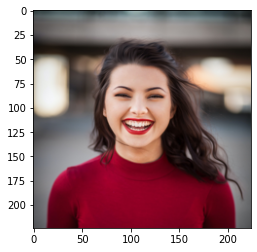

In [5]:
plt.imshow(query/255.0);

In [6]:
def absolute_difference(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    return np.sum(np.abs(X - query), axis=axis_batch_size)

In [10]:
%%time
ls_path_score = []
for folder in os.listdir(root_img_path):
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        images_np, images_path = folder_to_images(path) # mang numpy nhieu anh, paths
        rates = absolute_difference(query, images_np)
        ls_path_score.extend(list(zip(images_path, rates)))
#Wall time: 3min 36s

Wall time: 2min 29s


In [ ]:
# ABSOLUTE DIFF
#10 - 1140: 18.9 s
#50 - 6551: 1min 13s
#100 - 13292: 2min 29s
#all - 17046: 3min 36s

In [20]:
#10: 1140
#50: 6551
#100: 13292
#all: 17046

17046

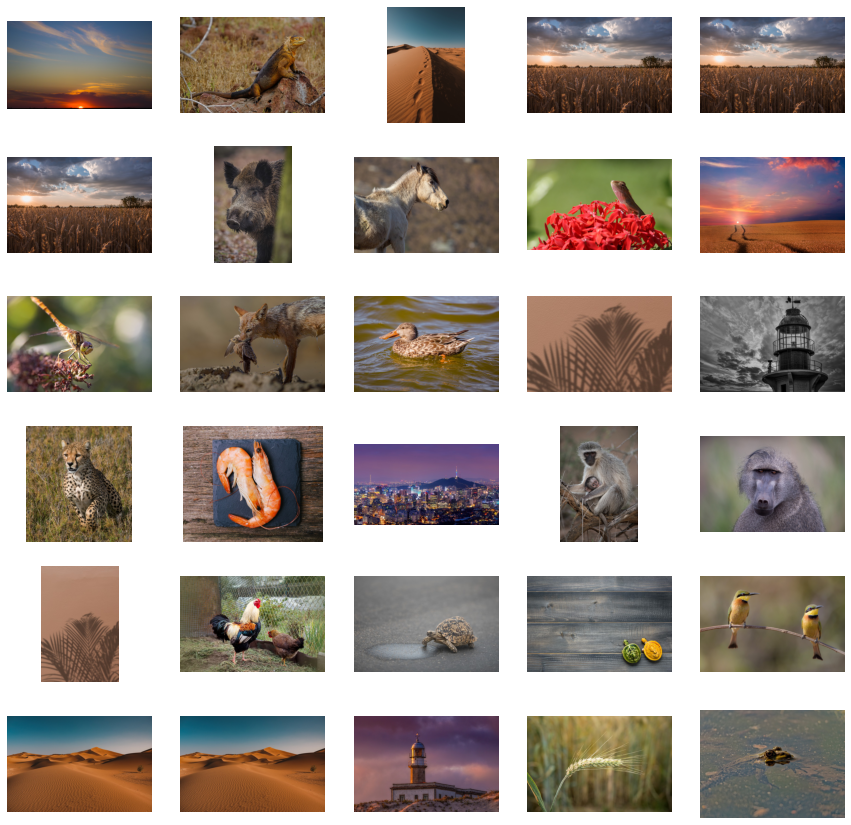

In [9]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1])[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 2. Mean Square Difference

In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

In [2]:
root_img_path = "img/"
dic_categories = ['scenery', 'furniture', 'animal', 'plant']
query_path = "big_smile_high.jpg"
size = (224, 224)

In [3]:
query = read_image_from_path(query_path, size)

In [4]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

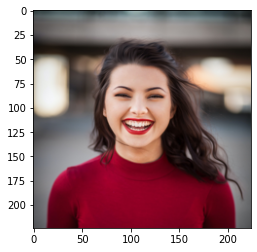

In [5]:
plt.imshow(query/255.0);

In [6]:
def mean_square_difference(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    return np.mean((X - query)**2, axis=axis_batch_size)

In [11]:
%%time
ls_path_score = []
for folder in os.listdir(root_img_path)[:100]:
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        images_np, images_path = folder_to_images(path)
        rates = mean_square_difference(query, images_np)
        ls_path_score.extend(list(zip(images_path, rates)))
        
#Wall time: 2min 55s

Wall time: 2min 19s


In [ ]:
# Mean Square Difference
#10 - 1140: 11.4 s
#50 - 6551: 1min 4s
#100 - 13292: 2min 19s
#all - 17046: 2min 55s

In [18]:
len(ls_path_score)

17044

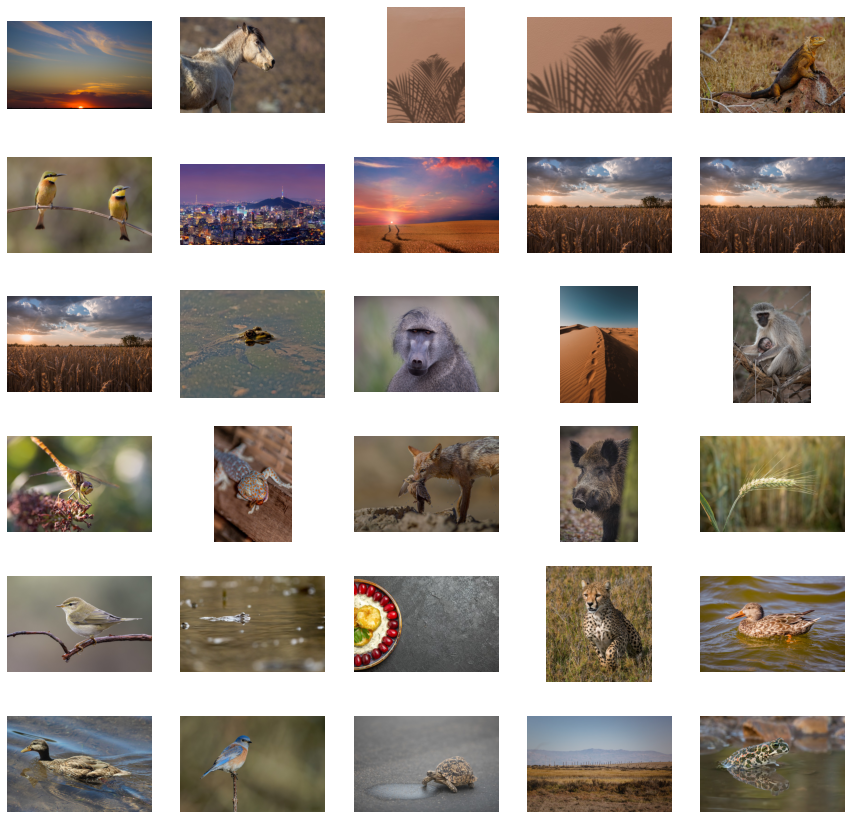

In [19]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1])[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 3. Cosine Similarity

In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

In [2]:
root_img_path = "img/"
dic_categories = ['scenery', 'furniture', 'animal', 'plant']
query_path = "big_smile_high.jpg"
size = (224, 224)

In [3]:
query = read_image_from_path(query_path, size)

In [4]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

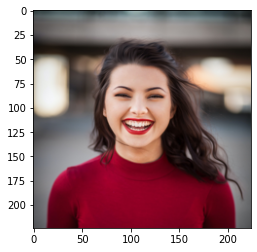

In [5]:
plt.imshow(query/255.0);

In [6]:
def cosine_similarity(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query**2))
    X_norm = np.sqrt(np.sum(X**2, axis=axis_batch_size))
    return np.sum(X * query, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [10]:
%%time
ls_path_score = []
for folder in os.listdir(root_img_path)[:100]:
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        images_np, images_path = folder_to_images(path)
        rates = cosine_similarity(query, images_np)
        ls_path_score.extend(list(zip(images_path, rates)))
        
#Wall time: 3min

Wall time: 2min 24s


In [9]:
# cosine_similarity
#10 - 1140: 12.4 s
#50 - 6551: 1min 7s
#100 - 13292: 2min 24s
#all - 17046: 3min

In [28]:
len(ls_path_score)

17044

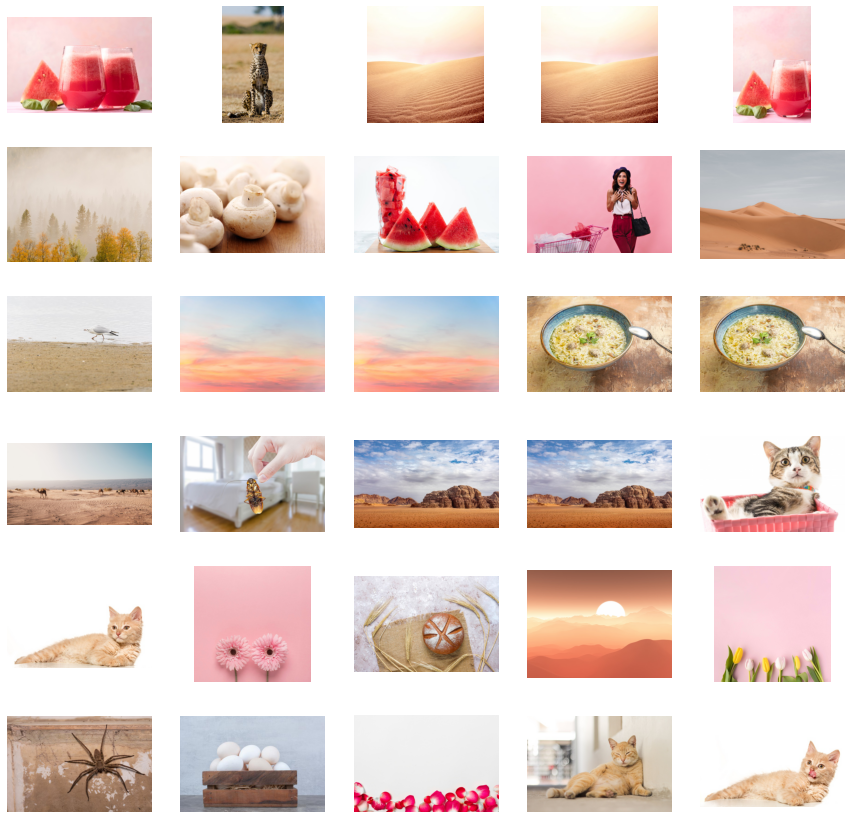

In [29]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse = True)[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 4. Correlation Coefficient

In [1]:
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

In [2]:
root_img_path = "img/"
dic_categories = ['scenery', 'furniture', 'animal', 'plant']
query_path = "big_smile_high.jpg"
size = (224, 224)

In [3]:
query = read_image_from_path(query_path, size)

In [4]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

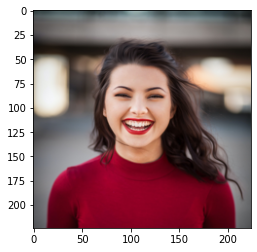

In [5]:
plt.imshow(query/255.0);

![](https://cdn.educba.com/academy/wp-content/uploads/2019/06/Correlation-Coefficient-Formula.jpg)

In [6]:
def correlation_coefficient(query, X):
    
    axis_batch_size = tuple(range(1,len(X.shape)))
    
    # Ứng dụng mean
    query_mean = query - np.mean(query)
    X_mean = X - np.mean(X, axis=axis_batch_size, keepdims=True)
    
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query_mean**2))
    X_norm = np.sqrt(np.sum(X_mean**2, axis=axis_batch_size))
    
    return np.sum(X_mean * query_mean, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [9]:
%%time
ls_path_score = []
for folder in os.listdir(root_img_path)[:100]:
    if folder.split("_")[0] in dic_categories:
        path = root_img_path + folder
        images_np, images_path = folder_to_images(path)
        rates = correlation_coefficient(query, images_np)
        ls_path_score.extend(list(zip(images_path, rates)))
        
#Wall time: 3min 12s

Wall time: 2min 36s


In [ ]:
# correlation_coefficient
#10 - 1140: 12.9 s
#50 - 6551: 1min 17s
#100 - 13292: 2min 36s
#all - 17046: 3min 12s

In [38]:
len(ls_path_score)

17044

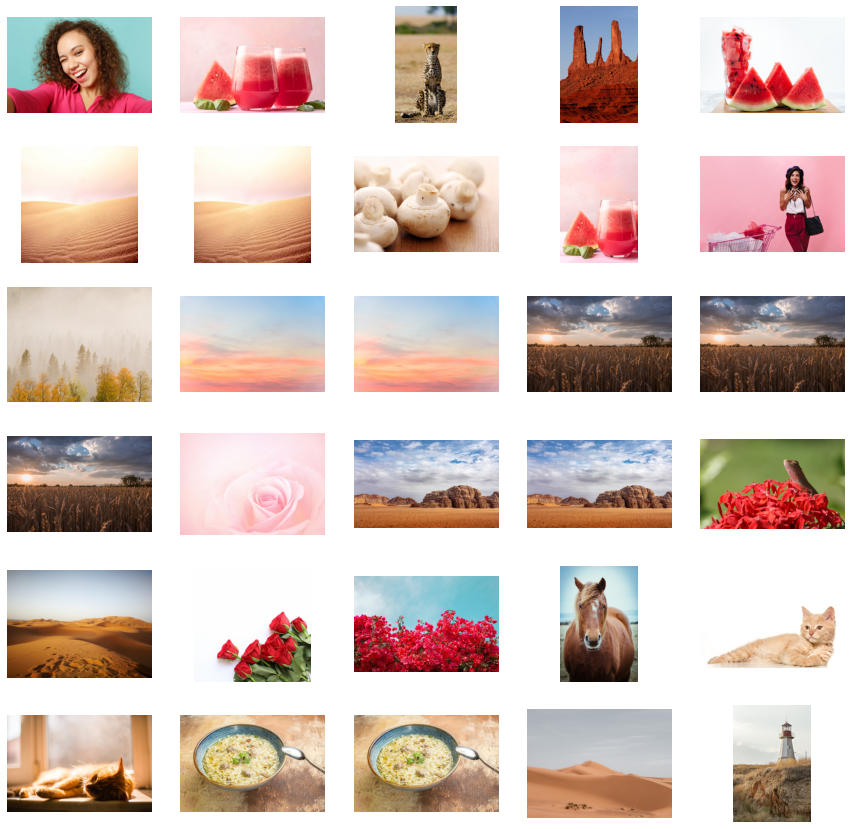

In [39]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse = True)[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 5. Feature Extractor with Convolution Neural Network

Chạy file offline_feature_extractor.py để Extractor Feature folders images từ folder img.

Sau khi chạy xong sẽ nhận được 1 file tại "feature/all_feartures.npz" 

In [40]:
# !python offline_feature_extractor.py

## 6. CNN + Absolute Diffence

In [1]:
import tensorflow as tf

from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

from feature_extractor import FeatureExtractor

In [2]:
query_path = "big_smile_high.jpg"
root_fearure_path = "feature/all_feartures.npz"
size = (224, 224)

In [3]:
data = np.load(root_fearure_path)
paths_feature = data["array1"]
imgs_feature = data["array2"]

In [4]:
fe = FeatureExtractor()

In [5]:
def absolute_difference(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    return np.sum(np.abs(X - query), axis=axis_batch_size)

In [6]:
query = read_image_from_path(query_path, size)

In [7]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

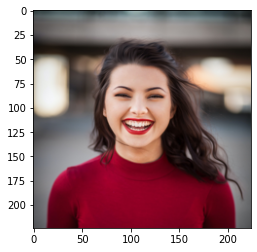

In [8]:
plt.imshow(query/255.0);

In [9]:
imgs_feature.shape

(17044, 2048)

In [10]:
imgs_feature[:1140].shape

(1140, 2048)

In [16]:
%%time
query_vector = fe.extract(query[None, :])
rates = absolute_difference(query_vector, imgs_feature)
ls_path_score = list(zip(paths_feature, rates))

#8.72 s

Wall time: 227 ms


In [ ]:
# cnn, absolute_difference
#10 - 1140: 72.8 ms
#50 - 6551: 125 ms
#100 - 13292: 190 ms
#all - 17046: 227 ms

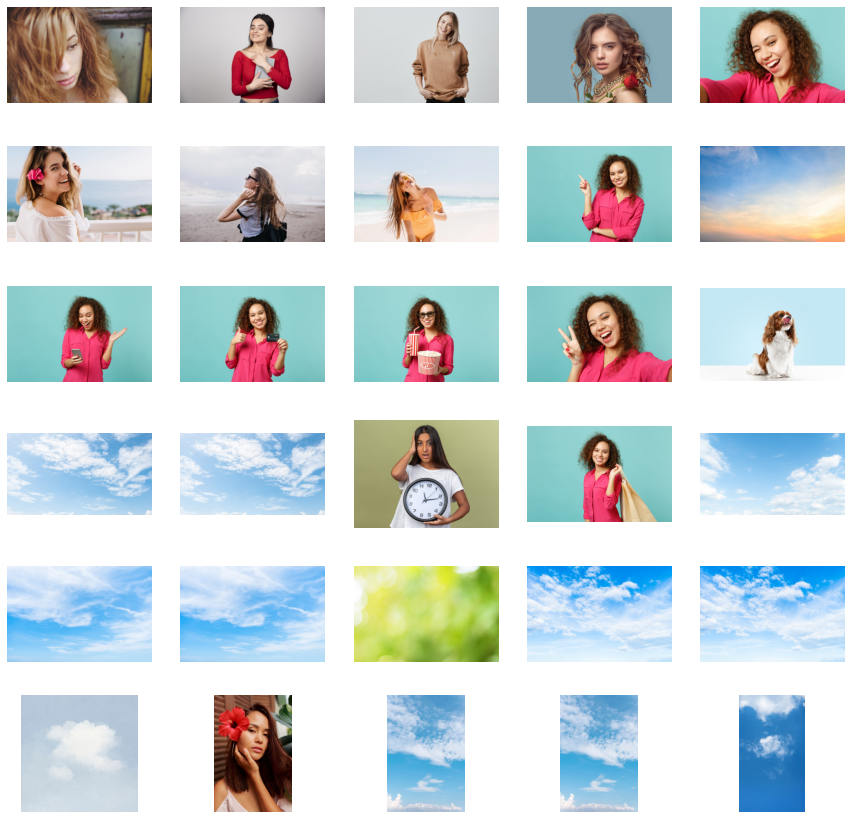

In [50]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1])[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 7. CNN + Mean Square Difference

In [51]:
import tensorflow as tf

from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

from feature_extractor import FeatureExtractor

In [52]:
query_path = "big_smile_high.jpg"
root_fearure_path = "feature/all_feartures.npz"
size = (224, 224)

In [53]:
data = np.load(root_fearure_path)
paths_feature = data["array1"]
imgs_feature = data["array2"]

In [54]:
fe = FeatureExtractor()

In [18]:
def mean_square_difference(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    return np.mean((X - query)**2, axis=axis_batch_size)

In [56]:
query = read_image_from_path(query_path, size)

In [57]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

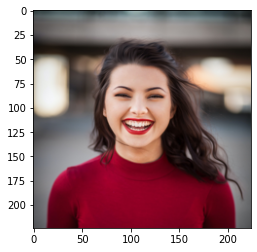

In [58]:
plt.imshow(query/255.0);

In [22]:
%%time
query_vector = fe.extract(query[None, :])
rates = mean_square_difference(query_vector, imgs_feature)
ls_path_score = list(zip(paths_feature, rates))

#1.41 s

Wall time: 229 ms


In [ ]:
# cnn, mean_square_difference
#10 - 1140: 73.8 ms
#50 - 6551: 127 ms
#100 - 13292: 208 ms
#all - 17046: 229 ms

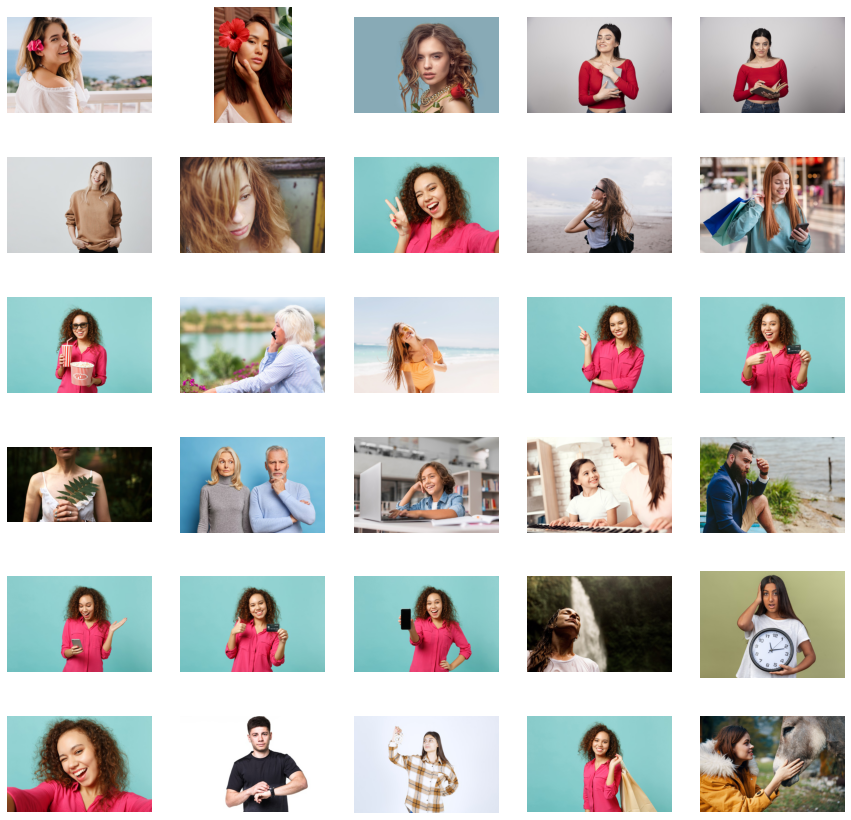

In [60]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1])[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 8. CNN + Cosine Similarity

In [1]:
import tensorflow as tf

from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

from feature_extractor import FeatureExtractor

In [2]:
query_path = "big_smile_high.jpg"
root_fearure_path = "feature/all_feartures.npz"
size = (224, 224)

In [3]:
data = np.load(root_fearure_path)
paths_feature = data["array1"]
imgs_feature = data["array2"]

In [4]:
fe = FeatureExtractor()

In [5]:
def cosine_similarity(query, X):
    axis_batch_size = tuple(range(1,len(X.shape)))
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query**2))
    X_norm = np.sqrt(np.sum(X**2, axis=axis_batch_size))
    return np.sum(X * query, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [30]:
query = read_image_from_path(query_path, size)

In [31]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

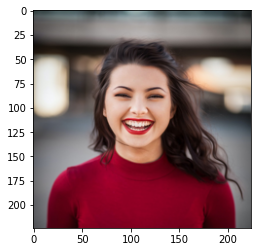

In [32]:
plt.imshow(query/255.0);

In [33]:
%%time
query_vector = fe.extract(query[None, :])
rates = cosine_similarity(query_vector, imgs_feature)
ls_path_score = list(zip(paths_feature, rates))

#227 ms

Wall time: 562 ms


In [34]:
# cnn, cosine_similarity
#10 - 1140: 74.8 ms
#50 - 6551: 139 ms
#100 - 13292: 217 ms
#all - 17046: 246 ms

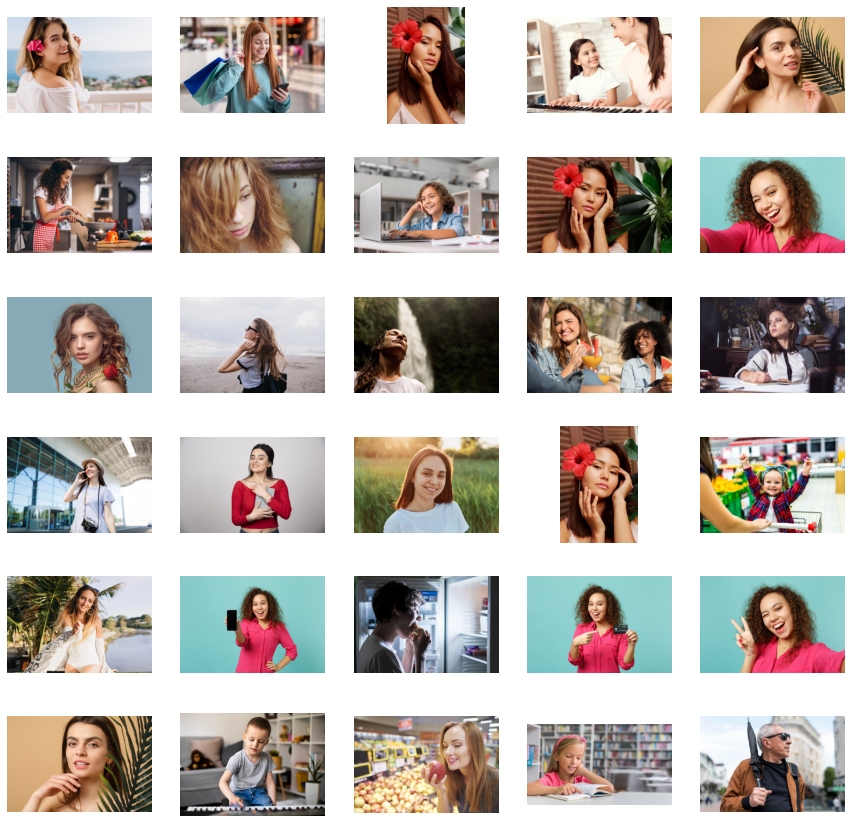

In [35]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse=True)[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

## 9. CNN + Correlation Coefficient

In [ ]:
import tensorflow as tf

from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt

from utils import (
    read_image_from_path,
    folder_to_images
)

from feature_extractor import FeatureExtractor

In [ ]:
query_path = "big_smile_high.jpg"
root_fearure_path = "feature/all_feartures.npz"
size = (224, 224)

In [ ]:
data = np.load(root_fearure_path)
paths_feature = data["array1"]
imgs_feature = data["array2"]

In [ ]:
fe = FeatureExtractor()

In [ ]:
def correlation_coefficient(query, X):
    
    axis_batch_size = tuple(range(1,len(X.shape)))
    
    # Ứng dụng mean
    query_mean = query - np.mean(query)
    X_mean = X - np.mean(X, axis=axis_batch_size, keepdims=True)
    
    # Ứng dụng norm
    query_norm = np.sqrt(np.sum(query_mean**2))
    X_norm = np.sqrt(np.sum(X_mean**2, axis=axis_batch_size))
    
    return np.sum(X_mean * query_mean, axis=axis_batch_size) / (query_norm*X_norm + np.finfo(float).eps)

In [ ]:
query = read_image_from_path(query_path, size)

In [ ]:
query.dtype, query.shape

(dtype('float32'), (224, 224, 3))

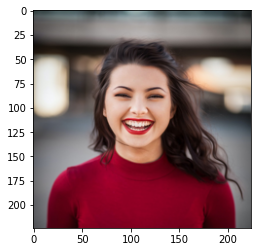

In [ ]:
plt.imshow(query/255.0);

In [24]:
%%time
query_vector = fe.extract(query[None, :])
rates = correlation_coefficient(query_vector, imgs_feature)
ls_path_score = list(zip(paths_feature, rates))

#1.15 s

Wall time: 401 ms


In [25]:
# cnn, correlation_coefficient
#10 - 1140: 78.8 ms
#50 - 6551: 172 ms
#100 - 13292: 266 ms
#all - 17046: 334 ms

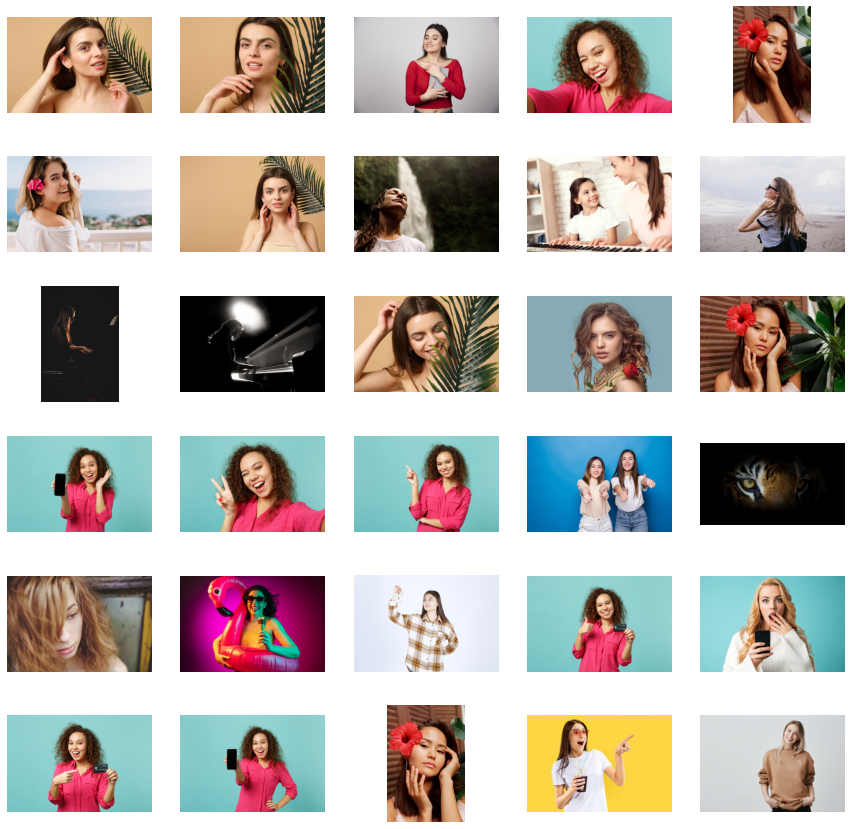

In [26]:
fig = plt.figure(figsize=(15, 15))
columns = 5
rows = 6
for i, path in enumerate(sorted(ls_path_score, key=lambda x : x[1], reverse=True)[:30], 1):
    img = np.random.randint(10, size=(10,10))
    fig.add_subplot(rows, columns, i)
    plt.imshow(plt.imread(path[0]))
    plt.axis("off")
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("static_time.csv")

In [3]:
df

1000    5000    15000    17000
0  18.900  73.000  149.000  216.000
1  11.400  64.000  139.000  175.000
2  12.400  67.000  144.000  180.000
3  12.900  77.000  156.000  192.000
4   0.072   0.125    0.190    0.227
5   0.738   0.127    0.208    0.229
6   0.748   0.139    0.217    0.246
7   0.788   0.172    0.226    0.334

In [4]:
df.index = ["ABS", "MSE", "Cosine", "Corr", "CNN + ABS", "CNN + MSE", "CNN + Cosine", "CNN + Corr"]

In [6]:
df = df.T

In [7]:
df

ABS    MSE  Cosine   Corr  CNN + ABS  CNN + MSE  CNN + Cosine  \
1000     18.9   11.4    12.4   12.9      0.072      0.738         0.748   
 5000    73.0   64.0    67.0   77.0      0.125      0.127         0.139   
 15000  149.0  139.0   144.0  156.0      0.190      0.208         0.217   
 17000  216.0  175.0   180.0  192.0      0.227      0.229         0.246   

        CNN + Corr  
1000         0.788  
 5000        0.172  
 15000       0.226  
 17000       0.334

In [8]:
n = np.array(df.index, dtype = np.float32)
n

array([ 1000.,  5000., 15000., 17000.], dtype=float32)

In [9]:
labels = list(df.columns)
labels

['ABS',
 'MSE',
 'Cosine',
 'Corr',
 'CNN + ABS',
 'CNN + MSE',
 'CNN + Cosine',
 'CNN + Corr']

In [10]:
timings = df.to_dict('list')
timings

{'ABS': [18.9, 73.0, 149.0, 216.0],
 'MSE': [11.4, 64.0, 139.0, 175.0],
 'Cosine': [12.4, 67.0, 144.0, 180.0],
 'Corr': [12.9, 77.0, 156.0, 192.0],
 'CNN + ABS': [0.072, 0.125, 0.19, 0.227],
 'CNN + MSE': [0.738, 0.127, 0.208, 0.229],
 'CNN + Cosine': [0.748, 0.139, 0.217, 0.246],
 'CNN + Corr': [0.788, 0.172, 0.226, 0.334]}

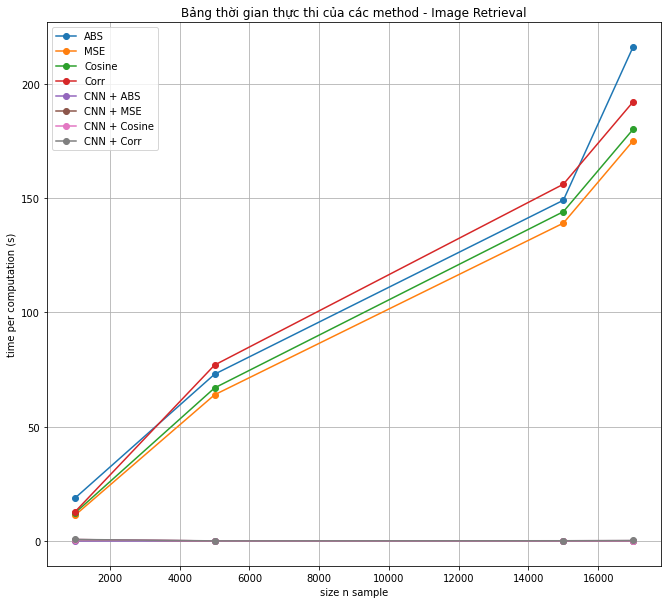

In [15]:
fig = plt.figure(figsize=(11,10))
for lb in labels:
    plt.plot(n, timings[lb], label=lb, marker='o')
plt.xlabel('size n sample')
plt.ylabel('time per computation (s)')
plt.legend(loc=2)
plt.grid()
# plt.xscale('log')
# plt.yscale('log')
plt.title("Bảng thời gian thực thi của các method - Image Retrieval")
plt.show()